# EE511 Project 5

### Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import random
import math


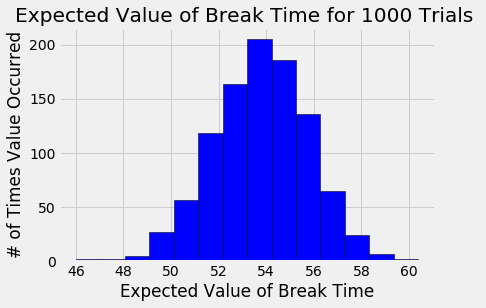

The minimum break time is:  46.01982101404659
The maximum break time is:  60.379024485408245
The mean of the expected break time is:  53.78303269582902


In [47]:
break_time_arr = np.zeros(1000)
for i in range(0,1000):
    mean = 1/25 #mean service time
    index = 0
    na = 0 # number of arrivals
    nd = 0 # number of departures
    N = 0 # number of customers
    t = 0 # current time
    T = 100; # Total hours of operation
    service_time = 0 # Service time of one job
    total_break_time = 0 # Total break time 
    service_comp_time = math.inf  # time after completion of current service

    time_array = np.empty(100000)
    time_array[index] = np.random.exponential(1/4)
    arr_rates = [4,7,10,13,16,19,16,13,10,7] #Variable poisson rates
    
    #print(time_array.shape)
    #print(time_array)
    
    while(time_array[index] < T):
        lamda = 19
        time = time_array[index]
        while (time < T):
            u1 = random.random()
            time = time - math.log(u1)/lamda
            u2 = random.random()
            modulus_time = (int(time) % 10) - 1
            #print(modulus_time)
            comp_time = arr_rates[modulus_time+1]/lamda
            if (u2 <= comp_time):
                time_array[index+1] = time
                index = index + 1
                break
    index = 0 
    total_break = time_array[index]
    arrival_time = time_array[index] 

    while(arrival_time <= T or N > 0): #Continue serving until no more 
        #customers arrive or queue has been cleared
        #Case 1
        if((arrival_time <= service_comp_time) and (arrival_time <=T)):
            if(t < arrival_time): #Update current time if only it is less than next arrival
                t=arrival_time
            na += 1
            N += 1
            if(index == len(time_array)-1):
                arrival_time = time_array[index]
            else:
                arrival_time = time_array[index + 1]
            if(N==1):
                service_comp_time = t + np.random.exponential(mean)
                t = service_comp_time
            index += 1

        # Case 2
        if((service_comp_time < arrival_time) and (service_comp_time <= T)):
            N -= 1
            nd += 1
            t = service_comp_time

            break_time = 0
            if(N == 0): 
                service_comp_time = math.inf

                while(t < arrival_time):

                    inc = 0.3 * random.random()
                    break_time = break_time + inc
                    t = t + inc
                total_break_time =  total_break_time+ break_time
            

            else:
                service_comp_time = t + np.random.exponential(mean)
                t = service_comp_time
            if (arrival_time > T):
                service_comp_time = t
            #total_break_time_arr.append(total_break_time)
        # case 3
        if(min(arrival_time,service_comp_time) > T and N >0):
            t = service_comp_time  #Update the time
            N = N - 1 #clear remaining customer
            nd +=1  #increase the departures
            service_comp_time = t+ np.random.exponential(mean) #add the service times

    # terminal case

    if(min(arrival_time,service_comp_time) > T and N == 0):
        #Queue clear
        Tp = max(t-T, service_comp_time - T) #Tp is the duration for which
        #server works to clear up queue after arrivals stop
    #total_break_time_arr.append(total_break_time)
    #print(total_break_time)   
    total_break_time_arr[i] = total_break_time



plt.hist(total_break_time_arr,bins = 14, edgecolor = 'black', facecolor = 'blue' )
#plt.xticks(np.arange(70,120))
plt.xlabel("Expected Value of Break Time")
plt.ylabel("# of Times Value Occurred")
plt.title("Expected Value of Break Time for 1000 Trials ")
plt.style.use('fivethirtyeight')
plt.show()
print("The minimum break time is: ",str(min(total_break_time_arr)))
print("The maximum break time is: ",str(max(total_break_time_arr)))
print("The mean of the expected break time is: ",str(total_break_time_arr.mean()))

### Q1 Analysis
- The histogram above shows the distribution of the different expected break values from this simulation for 1000 different trials.
- The values of break time range from around 46 to 60 for the 1000 trials, and this distribution generated has a mean of around 54. 
